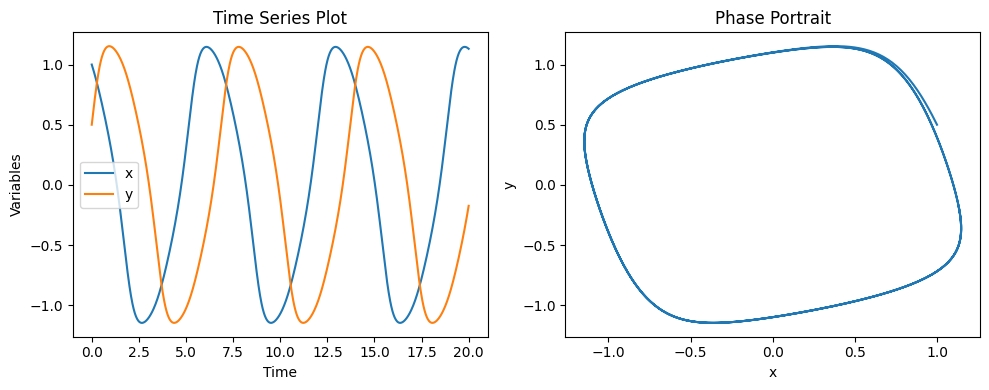

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of ODEs
def f(X, t):
    x, y = X
    dxdt = x - x**3 - y
    dydt = x + y - y**3
    return [dxdt, dydt]

# Generate time points for integration
t = np.linspace(0, 20, 1000)

# Set initial conditions
x0 = 1.0
y0 = 0.5
initial_conditions = [x0, y0]

# Solve the ODEs
sol = odeint(f, initial_conditions, t)

# Plot time series
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t, sol[:, 0], label='x')
plt.plot(t, sol[:, 1], label='y')
plt.xlabel('Time')
plt.ylabel('Variables')
plt.title('Time Series Plot')
plt.legend()

# Plot phase portrait
plt.subplot(1, 2, 2)
plt.plot(sol[:, 0], sol[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait')

plt.tight_layout()
plt.show()


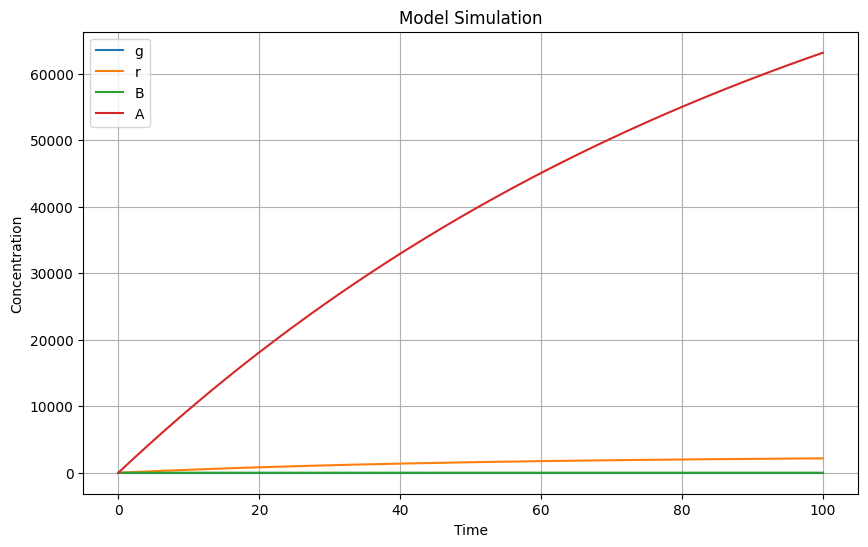

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define parameters
theta = 0.04
alpha = 0.001
rho_r = 5
delta_r = 0.02
rho_A = 100
gamma = 1
beta = 3
delta_B = 0.1
delta_A = 0.01

# Define the function representing the system of ODEs
def model(y, t, I):
    g, r, B, A = y
    
    # Define f(I) as the input signal function
    f_I = I[int(t)]  # Get the value of the input signal at time t
    
    # Define the differential equations
    dgdt = theta * (1 - g) - alpha * g * A
    drdt = f_I * rho_r * (1 - g) - delta_r * r
    dBdt = beta * f_I * r / (gamma * A + delta_B) - gamma * A * B - delta_B * B
    dAdt = f_I * rho_A - gamma * A * B - delta_A * A
    
    return [dgdt, drdt, dBdt, dAdt]

# Initial conditions
g0 = 0
r0 = 0
B0 = 0
A0 = 0

# Time points
t = np.linspace(0, 100, 1000)  # Define the time interval for simulation

# Input signal (in this case, let's make it a step function)
I = np.ones_like(t) * 10  # Example input signal, can be modified as needed

# Solve ODEs
y = odeint(model, [g0, r0, B0, A0], t, args=(I,))

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, y[:, 0], label='g')
plt.plot(t, y[:, 1], label='r')
plt.plot(t, y[:, 2], label='B')
plt.plot(t, y[:, 3], label='A')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Model Simulation')
plt.legend()
plt.grid(True)
plt.show()
